In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

Notebook to do time series analysis on crime in San Francisco from 2003 - 2017


In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('ggplot')

In [ ]:
# Import data, using parse_dates to turn Date column into datetime object
# https://stackoverflow.com/questions/17465045/can-pandas-automatically-recognize-dates
df = pd.read_csv('../../Police_Department_Incident_Reports__Historical_2003_to_May_2018.csv', parse_dates=['Date', 'Time'])

# Show all columns of dataframe
pd.set_option('display.max_columns', None)

In [98]:
# Keep key columns and sort
data = df[['Category', 'Descript', 'DayOfWeek', 'Date', 'Time', 'X', 'Y', 'PdDistrict', 'Resolution']]

data['Hour'] = pd.to_datetime(data['Time']).dt.hour
data = (
    data.dropna()
    .sort_values(by=['Date', 'Hour'])
)


/home/maureen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [99]:
data.head()

,Category,Descript,DayOfWeek,Date,Time,X,Y,PdDistrict,Resolution,Hour
244713,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,2003-01-01,00:30,-122.396698,37.716831,BAYVIEW,NONE,0
248766,FRAUD,FRAUDULENT CREDIT APPLICATION,Wednesday,2003-01-01,00:01,-122.383085,37.731752,BAYVIEW,NONE,0
254250,FORGERY/COUNTERFEITING,"CHECKS, MAKE OR PASS FICTITIOUS",Wednesday,2003-01-01,00:01,-122.445418,37.712075,INGLESIDE,NOT PROSECUTED,0
259998,SUSPICIOUS OCC,SUSPICIOUS OCCURRENCE,Wednesday,2003-01-01,00:01,-122.478748,37.755059,TARAVAL,UNFOUNDED,0
264392,OTHER OFFENSES,OBSCENE PHONE CALLS(S),Wednesday,2003-01-01,00:01,-122.407721,37.724547,BAYVIEW,NONE,0


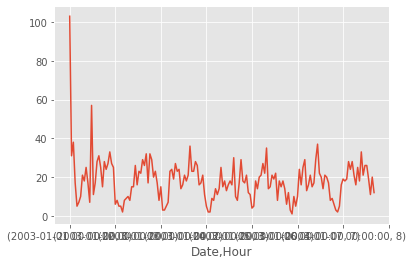

In [93]:
data.groupby(['Date', 'Hour']).size().iloc[0:168].plot()

ConversionError: Failed to convert value(s) to axis units: array([(Timestamp('2003-01-01 00:00:00'), 0),
       (Timestamp('2003-01-01 00:00:00'), 1),
       (Timestamp('2003-01-01 00:00:00'), 2),
       (Timestamp('2003-01-01 00:00:00'), 3),
       (Timestamp('2003-01-01 00:00:00'), 4),
       (Timestamp('2003-01-01 00:00:00'), 5),
       (Timestamp('2003-01-01 00:00:00'), 6),
       (Timestamp('2003-01-01 00:00:00'), 7),
       (Timestamp('2003-01-01 00:00:00'), 8),
       (Timestamp('2003-01-01 00:00:00'), 9),
       (Timestamp('2003-01-01 00:00:00'), 10),
       (Timestamp('2003-01-01 00:00:00'), 11),
       (Timestamp('2003-01-01 00:00:00'), 12),
       (Timestamp('2003-01-01 00:00:00'), 13),
       (Timestamp('2003-01-01 00:00:00'), 14),
       (Timestamp('2003-01-01 00:00:00'), 15),
       (Timestamp('2003-01-01 00:00:00'), 16),
       (Timestamp('2003-01-01 00:00:00'), 17),
       (Timestamp('2003-01-01 00:00:00'), 18),
       (Timestamp('2003-01-01 00:00:00'), 19),
       (Timestamp('2003-01-01 00:00:00'), 20),
       (Timestamp('2003-01-01 00:00:00'), 21),
       (Timestamp('2003-01-01 00:00:00'), 22),
       (Timestamp('2003-01-01 00:00:00'), 23),
       (Timestamp('2003-01-02 00:00:00'), 0),
       (Timestamp('2003-01-02 00:00:00'), 1),
       (Timestamp('2003-01-02 00:00:00'), 2),
       (Timestamp('2003-01-02 00:00:00'), 3),
       (Timestamp('2003-01-02 00:00:00'), 4),
       (Timestamp('2003-01-02 00:00:00'), 5),
       (Timestamp('2003-01-02 00:00:00'), 6),
       (Timestamp('2003-01-02 00:00:00'), 7),
       (Timestamp('2003-01-02 00:00:00'), 8),
       (Timestamp('2003-01-02 00:00:00'), 9),
       (Timestamp('2003-01-02 00:00:00'), 10),
       (Timestamp('2003-01-02 00:00:00'), 11),
       (Timestamp('2003-01-02 00:00:00'), 12),
       (Timestamp('2003-01-02 00:00:00'), 13),
       (Timestamp('2003-01-02 00:00:00'), 14),
       (Timestamp('2003-01-02 00:00:00'), 15),
       (Timestamp('2003-01-02 00:00:00'), 16),
       (Timestamp('2003-01-02 00:00:00'), 17),
       (Timestamp('2003-01-02 00:00:00'), 18),
       (Timestamp('2003-01-02 00:00:00'), 19),
       (Timestamp('2003-01-02 00:00:00'), 20),
       (Timestamp('2003-01-02 00:00:00'), 21),
       (Timestamp('2003-01-02 00:00:00'), 22),
       (Timestamp('2003-01-02 00:00:00'), 23),
       (Timestamp('2003-01-03 00:00:00'), 0),
       (Timestamp('2003-01-03 00:00:00'), 1),
       (Timestamp('2003-01-03 00:00:00'), 2),
       (Timestamp('2003-01-03 00:00:00'), 3),
       (Timestamp('2003-01-03 00:00:00'), 4),
       (Timestamp('2003-01-03 00:00:00'), 5),
       (Timestamp('2003-01-03 00:00:00'), 6),
       (Timestamp('2003-01-03 00:00:00'), 7),
       (Timestamp('2003-01-03 00:00:00'), 8),
       (Timestamp('2003-01-03 00:00:00'), 9),
       (Timestamp('2003-01-03 00:00:00'), 10),
       (Timestamp('2003-01-03 00:00:00'), 11),
       (Timestamp('2003-01-03 00:00:00'), 12),
       (Timestamp('2003-01-03 00:00:00'), 13),
       (Timestamp('2003-01-03 00:00:00'), 14),
       (Timestamp('2003-01-03 00:00:00'), 15),
       (Timestamp('2003-01-03 00:00:00'), 16),
       (Timestamp('2003-01-03 00:00:00'), 17),
       (Timestamp('2003-01-03 00:00:00'), 18),
       (Timestamp('2003-01-03 00:00:00'), 19),
       (Timestamp('2003-01-03 00:00:00'), 20),
       (Timestamp('2003-01-03 00:00:00'), 21),
       (Timestamp('2003-01-03 00:00:00'), 22),
       (Timestamp('2003-01-03 00:00:00'), 23),
       (Timestamp('2003-01-04 00:00:00'), 0),
       (Timestamp('2003-01-04 00:00:00'), 1),
       (Timestamp('2003-01-04 00:00:00'), 2),
       (Timestamp('2003-01-04 00:00:00'), 3),
       (Timestamp('2003-01-04 00:00:00'), 4),
       (Timestamp('2003-01-04 00:00:00'), 5),
       (Timestamp('2003-01-04 00:00:00'), 6),
       (Timestamp('2003-01-04 00:00:00'), 7),
       (Timestamp('2003-01-04 00:00:00'), 8),
       (Timestamp('2003-01-04 00:00:00'), 9),
       (Timestamp('2003-01-04 00:00:00'), 10),
       (Timestamp('2003-01-04 00:00:00'), 11),
       (Timestamp('2003-01-04 00:00:00'), 12),
       (Timestamp('2003-01-04 00:00:00'), 13),
       (Timestamp('2003-01-04 00:00:00'), 14),
       (Timestamp('2003-01-04 00:00:00'), 15),
       (Timestamp('2003-01-04 00:00:00'), 16),
       (Timestamp('2003-01-04 00:00:00'), 17),
       (Timestamp('2003-01-04 00:00:00'), 18),
       (Timestamp('2003-01-04 00:00:00'), 19),
       (Timestamp('2003-01-04 00:00:00'), 20),
       (Timestamp('2003-01-04 00:00:00'), 21),
       (Timestamp('2003-01-04 00:00:00'), 22),
       (Timestamp('2003-01-04 00:00:00'), 23),
       (Timestamp('2003-01-05 00:00:00'), 0),
       (Timestamp('2003-01-05 00:00:00'), 1),
       (Timestamp('2003-01-05 00:00:00'), 2),
       (Timestamp('2003-01-05 00:00:00'), 3),
       (Timestamp('2003-01-05 00:00:00'), 4),
       (Timestamp('2003-01-05 00:00:00'), 6),
       (Timestamp('2003-01-05 00:00:00'), 8),
       (Timestamp('2003-01-05 00:00:00'), 9),
       (Timestamp('2003-01-05 00:00:00'), 10),
       (Timestamp('2003-01-05 00:00:00'), 11),
       (Timestamp('2003-01-05 00:00:00'), 12),
       (Timestamp('2003-01-05 00:00:00'), 13),
       (Timestamp('2003-01-05 00:00:00'), 14),
       (Timestamp('2003-01-05 00:00:00'), 15),
       (Timestamp('2003-01-05 00:00:00'), 16),
       (Timestamp('2003-01-05 00:00:00'), 17),
       (Timestamp('2003-01-05 00:00:00'), 18),
       (Timestamp('2003-01-05 00:00:00'), 19),
       (Timestamp('2003-01-05 00:00:00'), 20),
       (Timestamp('2003-01-05 00:00:00'), 21),
       (Timestamp('2003-01-05 00:00:00'), 22),
       (Timestamp('2003-01-05 00:00:00'), 23),
       (Timestamp('2003-01-06 00:00:00'), 0),
       (Timestamp('2003-01-06 00:00:00'), 1),
       (Timestamp('2003-01-06 00:00:00'), 2),
       (Timestamp('2003-01-06 00:00:00'), 3),
       (Timestamp('2003-01-06 00:00:00'), 4),
       (Timestamp('2003-01-06 00:00:00'), 5),
       (Timestamp('2003-01-06 00:00:00'), 6),
       (Timestamp('2003-01-06 00:00:00'), 7),
       (Timestamp('2003-01-06 00:00:00'), 8),
       (Timestamp('2003-01-06 00:00:00'), 9),
       (Timestamp('2003-01-06 00:00:00'), 10),
       (Timestamp('2003-01-06 00:00:00'), 11),
       (Timestamp('2003-01-06 00:00:00'), 12),
       (Timestamp('2003-01-06 00:00:00'), 13),
       (Timestamp('2003-01-06 00:00:00'), 14),
       (Timestamp('2003-01-06 00:00:00'), 15),
       (Timestamp('2003-01-06 00:00:00'), 16),
       (Timestamp('2003-01-06 00:00:00'), 17),
       (Timestamp('2003-01-06 00:00:00'), 18),
       (Timestamp('2003-01-06 00:00:00'), 19),
       (Timestamp('2003-01-06 00:00:00'), 20),
       (Timestamp('2003-01-06 00:00:00'), 21),
       (Timestamp('2003-01-06 00:00:00'), 22),
       (Timestamp('2003-01-06 00:00:00'), 23),
       (Timestamp('2003-01-07 00:00:00'), 0),
       (Timestamp('2003-01-07 00:00:00'), 1),
       (Timestamp('2003-01-07 00:00:00'), 2),
       (Timestamp('2003-01-07 00:00:00'), 3),
       (Timestamp('2003-01-07 00:00:00'), 4),
       (Timestamp('2003-01-07 00:00:00'), 5),
       (Timestamp('2003-01-07 00:00:00'), 6),
       (Timestamp('2003-01-07 00:00:00'), 7),
       (Timestamp('2003-01-07 00:00:00'), 8),
       (Timestamp('2003-01-07 00:00:00'), 9),
       (Timestamp('2003-01-07 00:00:00'), 10),
       (Timestamp('2003-01-07 00:00:00'), 11),
       (Timestamp('2003-01-07 00:00:00'), 12),
       (Timestamp('2003-01-07 00:00:00'), 13),
       (Timestamp('2003-01-07 00:00:00'), 14),
       (Timestamp('2003-01-07 00:00:00'), 15),
       (Timestamp('2003-01-07 00:00:00'), 16),
       (Timestamp('2003-01-07 00:00:00'), 17),
       (Timestamp('2003-01-07 00:00:00'), 18),
       (Timestamp('2003-01-07 00:00:00'), 19),
       (Timestamp('2003-01-07 00:00:00'), 20),
       (Timestamp('2003-01-07 00:00:00'), 21),
       (Timestamp('2003-01-07 00:00:00'), 22),
       (Timestamp('2003-01-07 00:00:00'), 23),
       (Timestamp('2003-01-08 00:00:00'), 0),
       (Timestamp('2003-01-08 00:00:00'), 1)], dtype=object)

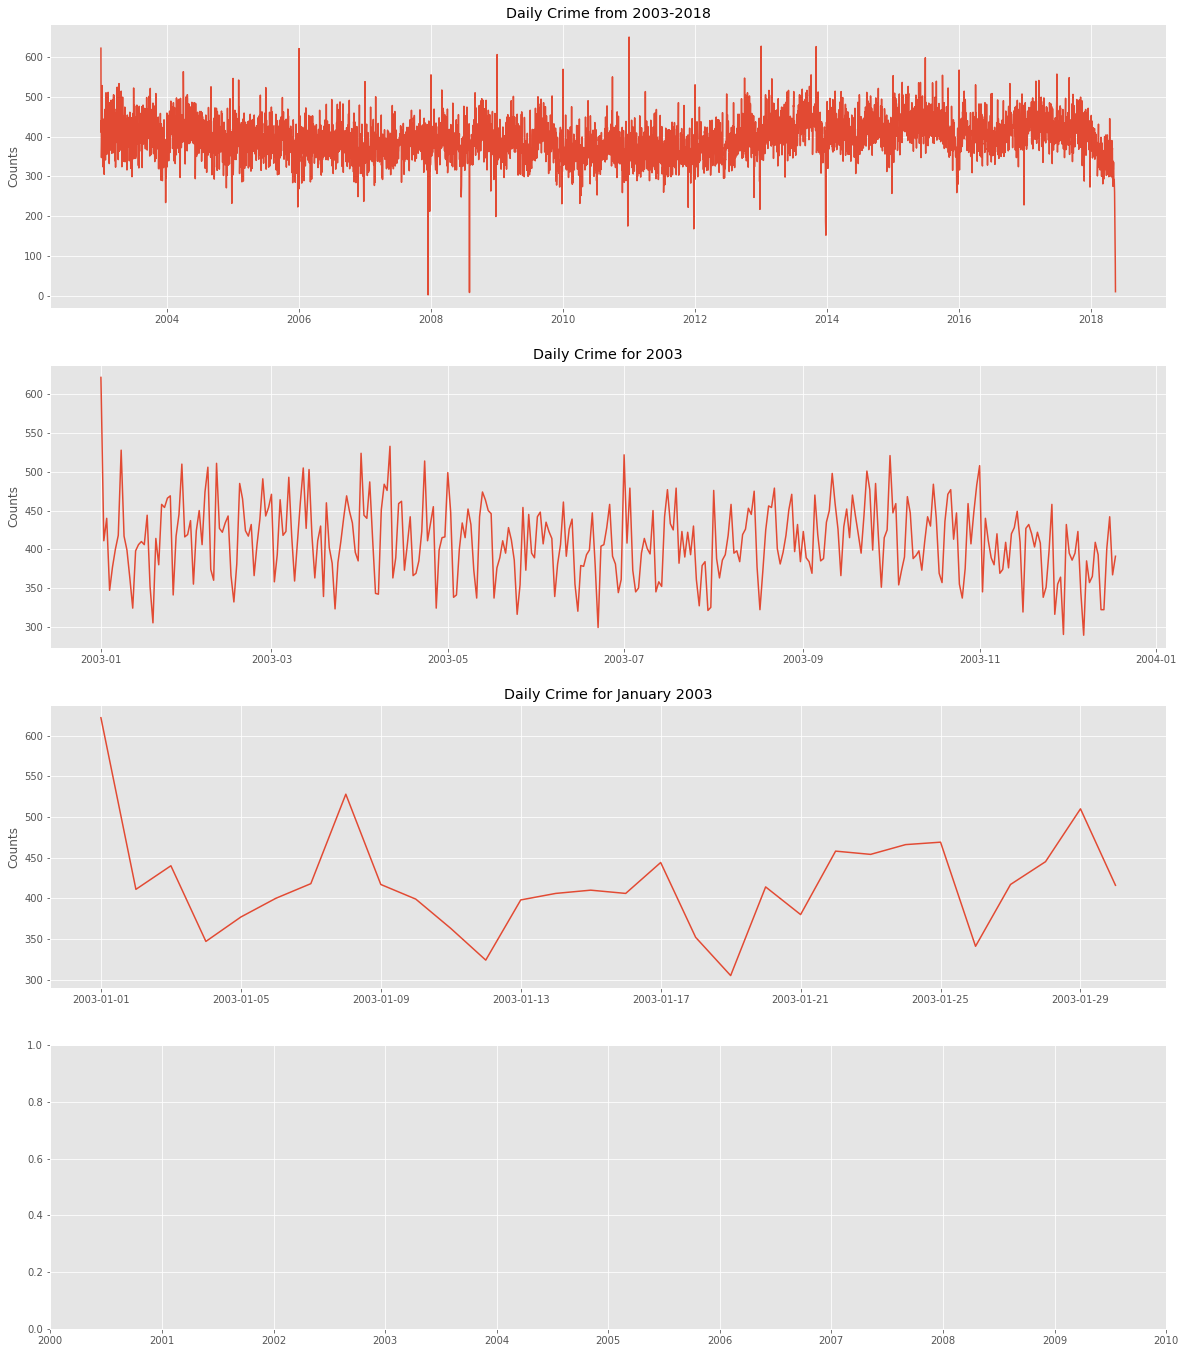

In [100]:
# Plot crimes
fig, axes = plt.subplots(4, 1, figsize=(20,24))
ax = axes[0]
ax.plot(data.groupby('Date').count()['Category'])
ax.set_title('Daily Crime from 2003-2018')
ax.set_ylabel('Counts')

ax = axes[1]
ax.plot(data.groupby('Date').count()['Category'].iloc[0:352])
ax.set_title('Daily Crime for 2003')
ax.set_ylabel('Counts')

ax = axes[2]
ax.plot(data.groupby('Date').count()['Category'].iloc[0:30])
ax.set_title('Daily Crime for January 2003')
ax.set_ylabel('Counts')

ax = axes[3]
ax.plot(data.groupby(['Date', 'Hour']).count().iloc[0:168])
ax.set_title('Hourly Crime for January 8th, 2003')
ax.set_ylabel('Counts')


plt.savefig('../data/images/Crimetrends.png', bbox_inches='tight', dpi=350)

### Trend Analysis

Looking at the data at various time scales shows that we may have a few different frequency components: weekly and seasonal. Had we looked at the time a crime is commited, we'd likely see a time trand as well (this was seeing during initial EDA). 

We'll likely need to do some resampling of the crime, but for now let's try to decompose the data using trend-season-residual decomposition. 